<a href="https://colab.research.google.com/github/Vaisakh-Babu/pandas_practice/blob/master/covid19data_practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid-19 data of United States
###Trying to Analyse the covid-19 data which is available at 
https://github.com/PayneLab/covid19pandas

In [2]:
! pip install covid19pandas

In [3]:
import covid19pandas as cvd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = cvd.get_data_nyt()

These data were obtained from The New York Times (https://github.com/nytimes/covid-19-data).


In [5]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
4629,2020-05-25,Virginia,51,37727,1208
4630,2020-05-25,Washington,53,21005,1076
4631,2020-05-25,West Virginia,54,1782,73
4632,2020-05-25,Wisconsin,55,15646,514


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4634 non-null   datetime64[ns]
 1   state   4634 non-null   object        
 2   fips    4634 non-null   int64         
 3   cases   4634 non-null   int64         
 4   deaths  4634 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 181.1+ KB


####The given data is cumulative
####We will try to create columns for daily data

In [0]:
df = cvd.calc_daily_change(df, 'cases','state')
df['daily_deaths'] = cvd.calc_daily_change(df,'deaths',"state")["daily_deaths"]

In [8]:
df

,date,state,fips,cases,deaths,daily_cases,daily_deaths
0,2020-01-21,Washington,53,1,0,1,0
1,2020-01-22,Washington,53,1,0,0,0
2,2020-01-23,Washington,53,1,0,0,0
3,2020-01-24,Illinois,17,1,0,1,0
4,2020-01-24,Washington,53,1,0,0,0
...,...,...,...,...,...,...,...
4629,2020-05-25,Virginia,51,37727,1208,1483,37
4630,2020-05-25,Washington,53,21005,1076,273,7
4631,2020-05-25,West Virginia,54,1782,73,11,1
4632,2020-05-25,Wisconsin,55,15646,514,284,4


In [0]:
ny = df.query("state == 'New York'")

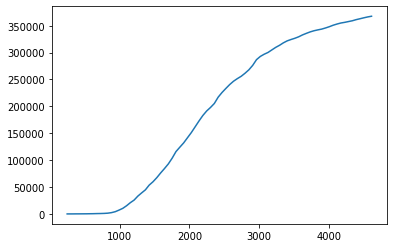

In [10]:
ny.cases.plot(kind = 'line')

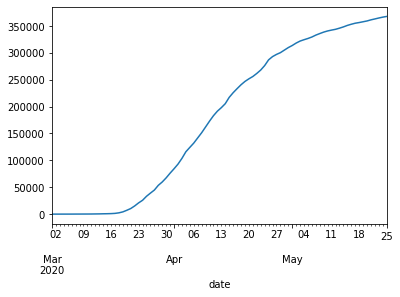

In [11]:
ny.set_index('date').cases.plot(kind = 'line')

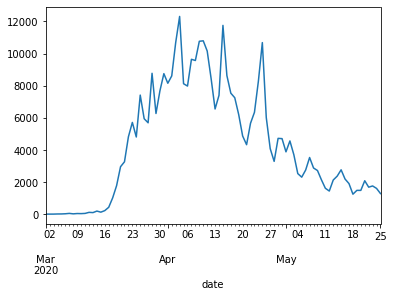

In [12]:
ny.set_index('date').daily_cases.plot(kind = 'line')

In [14]:
df.groupby('state')['cases'].max()

state
Alabama                      14986
Alaska                         412
Arizona                      16561
Arkansas                      6029
California                   97017
Colorado                     24256
Connecticut                  40873
Delaware                      8965
District of Columbia          8225
Florida                      51738
Georgia                      41414
Guam                          1135
Hawaii                         637
Idaho                         2664
Illinois                    112248
Indiana                      32489
Iowa                         17628
Kansas                        9272
Kentucky                      8899
Louisiana                    37916
Maine                         2074
Maryland                     47754
Massachusetts                93271
Michigan                     54816
Minnesota                    21324
Mississippi                  13458
Missouri                     12296
Montana                        479
Nebraska      

In [15]:
df.groupby('state')['cases'].max().sort_values()

state
Northern Mariana Islands        22
Virgin Islands                  69
Alaska                         412
Montana                        479
Hawaii                         637
Wyoming                        843
Vermont                        962
Guam                          1135
West Virginia                 1782
Maine                         2074
North Dakota                  2457
Idaho                         2664
Puerto Rico                   3260
Oregon                        3949
New Hampshire                 4197
South Dakota                  4586
Arkansas                      6029
Oklahoma                      6090
New Mexico                    7026
Nevada                        7959
District of Columbia          8225
Utah                          8521
Kentucky                      8899
Delaware                      8965
Kansas                        9272
South Carolina               10178
Missouri                     12296
Nebraska                     12355
Mississippi   